### Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            
age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance


Predict : Can you accurately predict insurance costs?


In [1]:
# importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
# loading the dataset
medical = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [3]:
# exploring the dataset
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# shape of the dataset
medical.shape

(1338, 7)

In [6]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# checking for missing values
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# distinct value in each column
for col in medical.columns:
    num = medical[col].nunique()
    print("The {0} column has {1} unique values" .format(col,num))

The age column has 47 unique values
The sex column has 2 unique values
The bmi column has 548 unique values
The children column has 6 unique values
The smoker column has 2 unique values
The region column has 4 unique values
The charges column has 1337 unique values


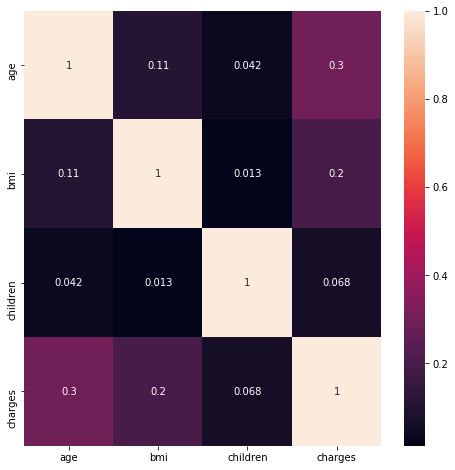

In [10]:
# visualizing the dataset
plt.figure(figsize = (8,8))
sns.heatmap(medical.corr(), annot = True)
plt.show()

In [11]:
medical['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

### Univariate Analysis

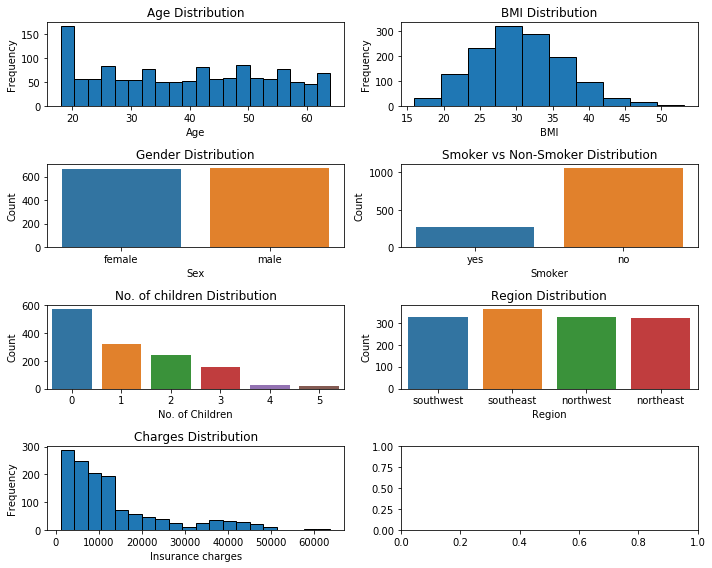

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))

#plotting each subplot
axes[0, 0].hist(medical['age'], bins=20, edgecolor='k')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(medical['bmi'], edgecolor='k')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

sns.countplot(data=medical, x='sex', ax=axes[1, 0])
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Gender Distribution')

sns.countplot(data=medical, x='smoker', ax=axes[1, 1])
axes[1, 1].set_xlabel('Smoker')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Smoker vs Non-Smoker Distribution')

sns.countplot(data=medical, x='children', ax=axes[2, 0])
axes[2, 0].set_xlabel('No. of Children')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('No. of children Distribution')

sns.countplot(data=medical, x='region', ax=axes[2, 1])
axes[2, 1].set_xlabel('Region')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Region Distribution')

axes[3, 0].hist(medical['charges'], bins=20, edgecolor='k')
axes[3, 0].set_title('Charges Distribution')
axes[3, 0].set_xlabel('Insurance charges')
axes[3, 0].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Bivariate Analysis

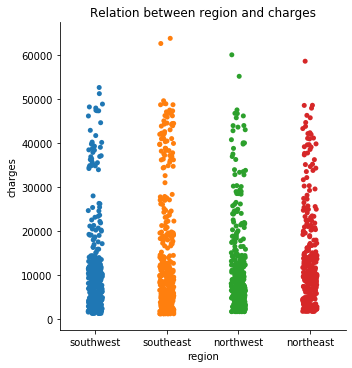

In [13]:
sns.catplot(data = medical, x='region', y= 'charges')
plt.title("Relation between region and charges")
plt.show()

This shows that the charges paid be the people of different regions does not vary much that is there is not much of a difference. So, this might not be a good indicator for calculating charges.

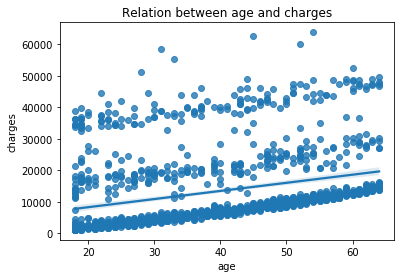

In [14]:
sns.regplot(data = medical, x='age', y= 'charges')
plt.title("Relation between age and charges")
plt.show()

The regression line indicates a positive correlation that is older people tends to pay a little more. so, age can play a small role in calculating charges.

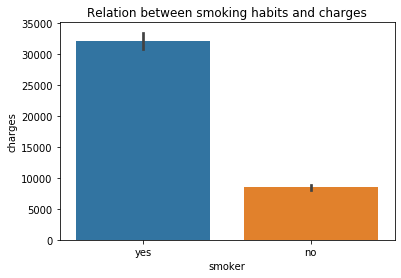

In [15]:
sns.barplot(data = medical, x='smoker', y='charges')
plt.title("Relation between smoking habits and charges")
plt.show()

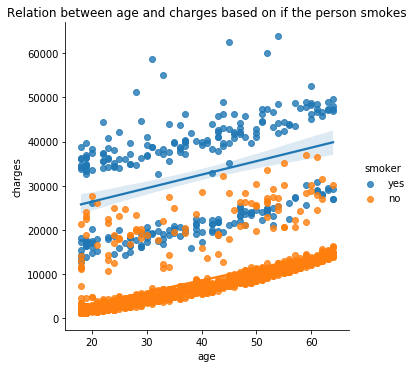

In [16]:
sns.lmplot(data=medical, x='age', y='charges', hue ='smoker')
plt.title("Relation between age and charges based on if the person smokes")
plt.show()

This shows that a person who smoke pays a higher amount as compared to the person of the same age who doesnot smoke. Thus smoking habits can be a crucial factor in predicting insurance charges 

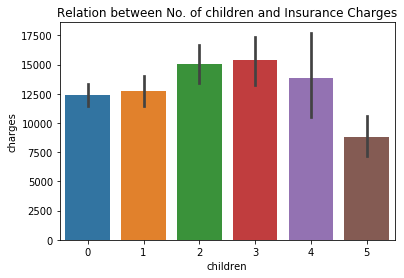

In [17]:
sns.barplot(data=medical, x='children', y='charges')
plt.title("Relation between No. of children and Insurance Charges")
plt.show()

This shows that people with 2-3 children tends to pay more and suprisingly, people with 5 children pays the least. Thus no of children is an important factor.

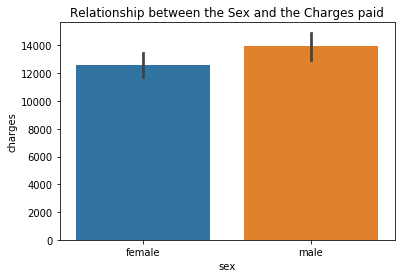

In [18]:
sns.barplot(data=medical, x='sex', y='charges')
plt.title("Relationship between the Sex and the Charges paid")
plt.show()

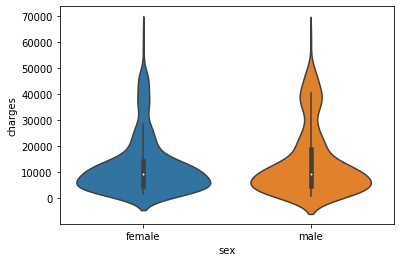

In [19]:
sns.violinplot(data=medical, x='sex', y='charges')
plt.show()

We cannot find much difference between cost paid by male and female in the second plot.The bar chart also shows that there is very little difference between average cost paid by male and female. Hence, sex of the person does not necessarily determine the insurance charges one pays.

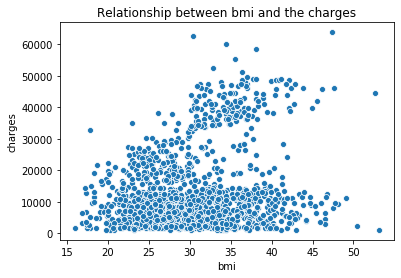

In [20]:
sns.scatterplot(data=medical, x='bmi', y='charges')
plt.title("Relationship between bmi and the charges")
plt.show()

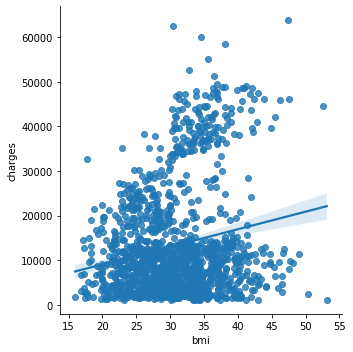

In [21]:
sns.lmplot(data=medical, x='bmi', y='charges')
plt.show()

The regression line shows that both the variables are positively correlated that is as the bmi os the person increase, he/she tends to pay more insurances charges.

The important predictors are--
1. Age
2. BMI
3. Smoker
4. Children

In [22]:
#adjusting column
medical['smoker'] = medical['smoker'].map({'yes': 1, 'no': 0})

In [23]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [24]:
numerical = ['age', 'bmi', 'smoker', 'children']
categorical = ['region', 'sex']
dummy= pd.get_dummies(medical,columns=categorical, drop_first=False)

In [25]:
dummy

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,0,1,16884.92400,0,0,0,1,1,0
1,18,33.770,1,0,1725.55230,0,0,1,0,0,1
2,28,33.000,3,0,4449.46200,0,0,1,0,0,1
3,33,22.705,0,0,21984.47061,0,1,0,0,0,1
4,32,28.880,0,0,3866.85520,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0,1,0,0,0,1
1334,18,31.920,0,0,2205.98080,1,0,0,0,1,0
1335,18,36.850,0,0,1629.83350,0,0,1,0,1,0
1336,21,25.800,0,0,2007.94500,0,0,0,1,1,0


In [26]:
scaler = StandardScaler()

#scaling numerical columns
num_scaled = scaler.fit_transform(medical[numerical])

In [27]:
num_scaled = pd.DataFrame(num_scaled, columns=numerical)

In [28]:
medical_scaled = pd.concat([num_scaled, dummy.drop(numerical, axis=1)], axis=1)

In [29]:
medical_scaled

,age,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,-1.438764,-0.453320,1.970587,-0.908614,16884.92400,0,0,0,1,1,0
1,-1.509965,0.509621,-0.507463,-0.078767,1725.55230,0,0,1,0,0,1
2,-0.797954,0.383307,-0.507463,1.580926,4449.46200,0,0,1,0,0,1
3,-0.441948,-1.305531,-0.507463,-0.908614,21984.47061,0,1,0,0,0,1
4,-0.513149,-0.292556,-0.507463,-0.908614,3866.85520,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,-0.507463,1.580926,10600.54830,0,1,0,0,0,1
1334,-1.509965,0.206139,-0.507463,-0.908614,2205.98080,1,0,0,0,1,0
1335,-1.509965,1.014878,-0.507463,-0.908614,1629.83350,0,0,1,0,1,0
1336,-1.296362,-0.797813,-0.507463,-0.908614,2007.94500,0,0,0,1,1,0


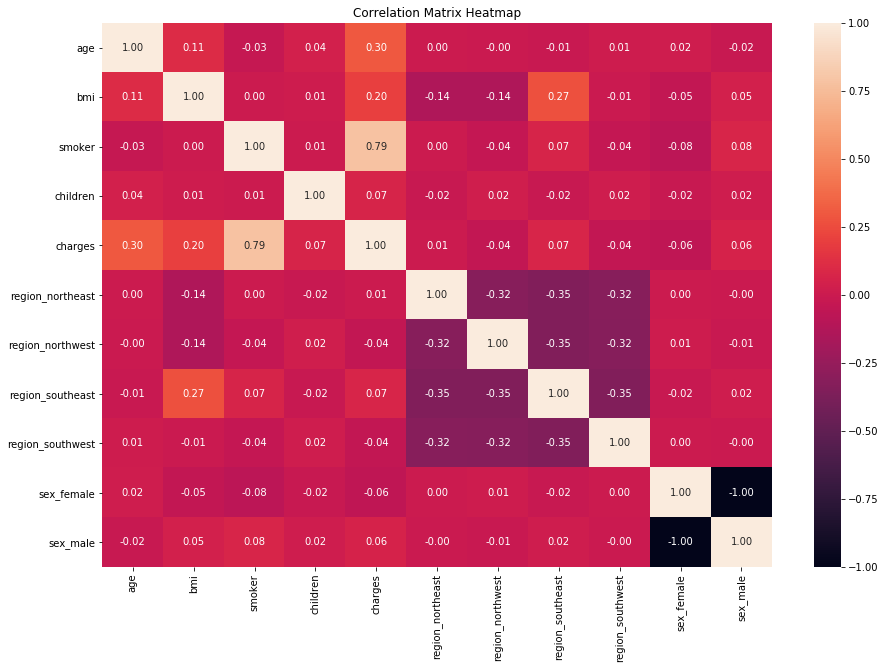

In [30]:
# Correlattion Matrix
med_corr = medical_scaled.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(med_corr, annot=True, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [31]:
med_corr['charges'].sort_values(ascending=False)


charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
sex_female         -0.057292
Name: charges, dtype: float64

In [32]:
# splitting data ino train and test
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [33]:
X = medical_scaled.drop('charges', axis=1)
y = medical_scaled['charges']

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.30)

In [34]:
X_train.head()

,age,bmi,smoker,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
500,-0.726752,0.612969,1.970587,-0.908614,0,0,0,1,0,1
936,0.341265,-0.152298,-0.507463,0.751079,1,0,0,0,0,1
58,0.982076,-1.276823,1.970587,-0.078767,0,0,1,0,1,0
1038,-1.225161,-0.292556,-0.507463,-0.908614,1,0,0,0,0,1
905,-0.940356,-0.214635,-0.507463,0.751079,1,0,0,0,1,0


In [35]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred_lr = LR.predict(X_test)
R2_score = print("R2 score is ", r2_score(y_test,y_pred_lr))
MSE = print("Mean Squared Error(MSE)", mean_squared_error(y_test,y_pred_lr))
RMSE = print("Root Mean Squared Error(RMSE)", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
MAE = print("Mean Absolute Error(MAE)", mean_absolute_error(y_test,y_pred_lr))

R2 score is  0.7401717040951772
Mean Squared Error(MSE) 44293849.442401506
Root Mean Squared Error(RMSE) 6655.362457627797
Mean Absolute Error(MAE) 4486.728724292825


In [36]:
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
y_pred_rf = LR.predict(X_test)
R2_score = print("R2 score is ", r2_score(y_test,y_pred_rf))
MSE = print("Mean Squared Error(MSE)", mean_squared_error(y_test,y_pred_rf))
RMSE = print("Root Mean Squared Error(RMSE)", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
MAE = print("Mean Absolute Error(MAE)", mean_absolute_error(y_test,y_pred_rf))

R2 score is  0.7401717040951772
Mean Squared Error(MSE) 44293849.442401506
Root Mean Squared Error(RMSE) 6655.362457627797
Mean Absolute Error(MAE) 4486.728724292825


In [37]:
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred_l = lasso.predict(X_test)
R2_score = print("R2 score is ", r2_score(y_test,y_pred_l))
MSE = print("Mean Squared Error(MSE)", mean_squared_error(y_test,y_pred_l))
RMSE = print("Root Mean Squared Error(RMSE)", np.sqrt(mean_squared_error(y_test,y_pred_l)))
MAE = print("Mean Absolute Error(MAE)", mean_absolute_error(y_test,y_pred_l))

R2 score is  0.7401615611403157
Mean Squared Error(MSE) 44295578.54782466
Root Mean Squared Error(RMSE) 6655.492359534692
Mean Absolute Error(MAE) 4486.498693946391


In [38]:
regr = SVR()
regr.fit(X_train,y_train)
y_pred_sv = regr.predict(X_test)
R2_score = print("R2 score is ", r2_score(y_test,y_pred_sv))
MSE = print("Mean Squared Error(MSE)", mean_squared_error(y_test,y_pred_sv))
RMSE = print("Root Mean Squared Error(RMSE)", np.sqrt(mean_squared_error(y_test,y_pred_sv)))
MAE = print("Mean Absolute Error(MAE)", mean_absolute_error(y_test,y_pred_sv))

R2 score is  -0.1571152936435003
Mean Squared Error(MSE) 197257540.50636518
Root Mean Squared Error(RMSE) 14044.840351757835
Mean Absolute Error(MAE) 9143.874457463733


In [47]:
# using cross val score on every regressor
score1 = cross_val_score(LR,X,y,cv=5)
print("Cross-Validation Scores: ", score1)
print("Mean Score:", score1.mean())
print("Diffrenece between Mean Score and R2 score for linear regressor", (r2_score(y_test,y_pred_lr)-score4.mean())*100)

print("\n")
score2 = cross_val_score(RFR,X,y,cv=5)
print("Cross-Validation Scores: ", score2)
print("Mean Score:", score2.mean())
print("Diffrenece between Mean Score and R2 score random forest regressor",(r2_score(y_test,y_pred_rf)-score4.mean())*100)

print("\n")
score3 = cross_val_score(regr,X,y,cv=5)
print("Cross-Validation Scores: ", score3)
print("Mean Score:", score3.mean())
print("Diffrenece between Mean Score and R2 score svregressor", (r2_score(y_test,y_pred_sv)-score4.mean())*100)

print("\n")
score4 = cross_val_score(lasso,X,y,cv=5)
print("Cross-Validation Scores: ", score4)
print("Mean Score:", score4.mean())
print("Diffrenece between Mean Score and R2 score lasso regressor", (r2_score(y_test,y_pred_l)-score4.mean())*100)

Cross-Validation Scores:  [0.76148179 0.70649339 0.77806343 0.73269475 0.75557475]
Mean Score: 0.7468616243473741
Diffrenece between Mean Score and R2 score for linear regressor -0.6700138526123722


Cross-Validation Scores:  [0.85091532 0.76425907 0.85950528 0.82394096 0.83752387]
Mean Score: 0.8272288993244903
Diffrenece between Mean Score and R2 score random forest regressor -0.6700138526123722


Cross-Validation Scores:  [-0.10893686 -0.10589188 -0.07497781 -0.0998497  -0.10080806]
Mean Score: -0.09809286338617329
Diffrenece between Mean Score and R2 score svregressor -90.39871362648012


Cross-Validation Scores:  [0.76148289 0.70655468 0.77804199 0.73268738 0.75559227]
Mean Score: 0.7468718426213009
Diffrenece between Mean Score and R2 score lasso regressor -0.6710281480985181


The SVR model performs the worst as compared to other models.